# Задание 1 (1 балл)

Вы работаете продуктовым аналитиком в команде Алисы в Яндексе. В команде появилась новая идея - научить Алису рекомендовать фильмы и сериалы под настроение и вкусы пользователя.

Путь пользователя будет выглядеть так:
* Пользователь спрашивает "Алиса, порекомендуй фильм" или "Алиса, посоветуй фильм под хорошее настроение"
* Алиса задает уточняющие вопросы. Например, "Старый или новый фильм вы хотите?" или "Хотите фильм из жанра комедии?"
* По результатам Алиса рекомендует фильм с учетом вкусов пользователя

Ваша задача - понять на сколько эта фича востребована сейчас, затратив минимальные усилия на ее разработку.

Опишите как минимум два подхода, как бы вы решали эту задачу

Действительно, создавать полностью фичу и проводить АБ-тест сликшом трудозатратно

Предлагаю следующие варианты:
* можно сделать опрос пользователей Алисы нативно: Алиса в какой-то момент взаимодействия с пользователем спрашивает что-то вроде "Можно задать вопрос?" (все-таки пользователь должен быть расположен к такого рода взаимодействию), если юзер отвечает положительно, то спросить его "Вы бы хотели, чтобы я умела рекомендовать фильмы?" и/или "Какова вероятность от 1 до 10, что вы будете пользоваться этой фичей." Аналогично можно провести что-то подобное на Кинопоиске (для тех, кто не пользуется Алисой). Так мы можем даже потенциально расширить аудиторию Алисы (если среди юзеров Кинопоиска будет достаточно желающих проверить фичу у Алисы);
* пожалуй, создавать целую рекомендательную систему с учетом потребностей пользователя тяжело, однако кажется, это и не нужно делать, учитывая что у Яндекса есть Кинопоиск. Во-первых, там уже есть рекомендательная система фильмов и сериалов для тех, кто пользуется этим сервисом (фильмы для вас и рекомендуемые сериалы), учитывающая вкусы пользователя + в самом яндекс поиске, если пользователь ищет какой-то фильм, то яндекс показывает персональный рейтинг того, насколько сериал или фильм подходит пользователю на основании оценок на Кинопоиске. Таким образом, возможно, интегрировать эти фичи из смежных сервисов не так сложно как создавать их с нуля для Алисы. Есть проблема с новыми пользователями или с теми, кто не ставит оценки на Кинопоиске. Может быть стоит проверить фичу на тех, для кого рекомендательная система работает (во всяком случае, кажется, эти люди больше похожи на целевую аудиторию фичи для Алисы), а решать проблему для остальных юзеров позже, если в фиче потребность есть;
* также можно в целом посмотреть сколько пользователей Алисы также пользуются Кинопоиском, и, наоборот, сколько пользователей Кинопоиска пользуются Алисой. Посмотреть на различные метрики поведения на Кинопоиске этих юзеров: как часто они ищут фильмы, пользуются разделом "рекомендовано вас", просматривает "списки фильмов". Полагаю, что заинтересованность в поиске фильмов и кино должна коррелировать с потребностью в такой фиче для Алисы

# Задание 2

## 2.1 (0.5 балла)

В файле data.tsv представлены логи пользователей для стартапа по автоматической генерации рекламных объявлений, который мы рассматривали на лекции.

Напомним, как выглядит путь пользователя в этом продукте:
1. Пользователь заходит на Landing-page, на которой представлена основная информация о продукте.
2. Если его заинтересовал продукт, ему нужно зарегестрироваться, чтобы им воспользоваться.
3. Далее он попадает в Личный Кабинет, где может указать URL своего сайта и запустить для него генерацию рекламных объявлений.
4. Когда пользователь запускает генерацию, мы прокачиваем информацию с его сайта и подаем на вход генеративным нейросетям.
5. Когда генерация закончена, мы показываем готовые рекламные объявления пользователю. Далее пользователь использует эти объявления на рекламных площадках для продвижения своего бизнеса.
6. Пользователю предлагается 3 бесплатных генерации, после чего ему предлагается опатить сервис, чтобы пользоваться дальше.

Опишем события
* event_timestamp - время, когда произошло событие в формате datetime
* user_id - уникальные идентификатор пользователя
* event_name - тип события. Существуют следующие типы:
    * visit_landing - посещение лендинга
    * visit_cabinet - посещение ЛК
    * generate - запуск генерации рекламного объявления
    * results_shown - пользователь увидел результаты генерации
    * payment - пользователь оплатил сервис
* traffic_name - для событий **event_name = visit_landing** в этом поле записывается Маркетинговый канал с которого мы привлекли пользователя на наш сервис
* generation_time - для событий **event_name = generate** время в секундах, сколько длилась генерация. Если поле пустое, то генерация по каким-то причинам упала с ошибкой

Ваша задача - нарисовать воронку уникальных пользователей по основным этапам
* Пришел на лендинг
* Зарегистрировался
* Запустил генерацию
* Увидел результаты
* Оплатил

Для отрисовки воронки рекомендуем использовать библиотеку plotly

In [1]:
import pandas as pd
df = pd.read_csv("data.tsv", sep="\t")

In [2]:
funnel_df = df[['user_id', 'event_name']].groupby('event_name').nunique()
funnel_df = funnel_df.sort_values(by=['user_id'], ascending=False)
funnel_df

,user_id
event_name,
visit_landing,17659
visit_cabinet,4256
generate,972
results_shown,710
payment,11


In [3]:
funnel_names = ['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты', 'Оплатил']
funnel_values = funnel_df['user_id'].values.tolist()

In [4]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = funnel_names,
    x = funnel_values,
    textinfo = "value+percent initial")
)

fig.show()

# 2.2 (0.5 балла)

Видно, что до этапа оплаты доходит очень мало пользователей. Давайте заменим последний этап на другой показатель - "Количество пользователей с минимум двумя успешными генерациями".
Так у нас будет больше статистики на последнем этапе. При этом, по логике продукта, этот этап должен коррелировать с оплатами.

Нарисуйте воронку, заменив последний этап на предложенный показатель.

In [5]:
# успешная генерация - та, у которой время генерации не NaN
generation_per_user_df = df[['user_id', 'event_name']].loc[(df.event_name == 'generate')&(~df.generation_time.isna())].groupby('user_id').count()
two_or_more_generations = (generation_per_user_df['event_name'] >= 2).sum()

In [6]:
fig = go.Figure(go.Funnel(
    y = funnel_names[:-1] + ['Сделал 2 генерации'],
    x = funnel_values[:-1] + [two_or_more_generations],
    textinfo = "value+percent initial")
)

fig.show()

## 2.3 (1 балл)

Сейчас мы превлекаем клиентов на сайт с помощью нескольких маркетинговых компаний (колонка traffic_source). Команда маркетинга, просит вас помочь им понять, какая из рекламных компаний более выгодная: source1 или source2.

Помогите им это определить, учитывая что стоимость привлечения одного человека на лендинг для
* source1 - 2 цента
* source2 - 1 цент

и мы хотим растить последний этап воронки с предыдущего задания

Нужно не только дать ответ, но и расписать как вы к нему пришли.

In [7]:
sourse1_users = set(df['user_id'].loc[df.traffic_name == 'source1'].values) # все пользователи с капании 1
sourse2_users = set(df['user_id'].loc[df.traffic_name == 'source2'].values) # все пользователи с капании 2
two_or_more_generations = generation_per_user_df['event_name'].loc[generation_per_user_df.event_name >= 2] # здесь индексы - пользователи, а значения - количество успешных генераций, мы отсекли по 2
funnel_users = set(two_or_more_generations.index) # получили множество пользователей, дошедших до конца воронки

# нашли сколько людей на лэндинге от каждой кампании
s1_in_landing = len(sourse1_users)
s2_in_landing = len(sourse2_users)

# сколько людей в конце воронки от каждой кампании
s1_in_funnel = len(sourse1_users & funnel_users)
s2_in_funnel = len(sourse2_users & funnel_users)

# суммарные расходы на каждую кампанию
total_costs_s1 = s1_in_landing*2/100
total_costs_s2 = s2_in_landing/100

# во сколько долларов нам обошелся каждый человек в конце воронки от каждой кампании (Customer Acquisition Cost)
s1_cac = total_costs_s1/s1_in_funnel
s2_cac = total_costs_s2/s2_in_funnel

pd.DataFrame({'users_in_landing': [s1_in_landing, s2_in_landing],
 'users_with_two_generations': [s1_in_funnel, s2_in_funnel],
 'total_costs, $': [total_costs_s1, total_costs_s2],
 'cac, $': [s1_cac, s2_cac]}, index=['sourse1', 'sourse2']).T

,sourse1,sourse2
users_in_landing,6928.000000,4263.0000
users_with_two_generations,74.000000,28.0000
"total_costs, $",138.560000,42.6300
"cac, $",1.872432,1.5225


Таким образом, несмотря на то, что рекламная кампания 1 привлекла в 2,6 раз больше пользователей к финальному уровню воронки, затраты на каждого пользователя с двумя успешными генерациями получились выше, чем в рекламной кампании 2. Поэтому более выгодна рекламная кампания 2.

## 2.4 (1 балл)

Команда хочет понимать, что движется в правильном направлении и релизы действительно улучшают показатели воронки.

Постройте линейные графики конверсий соседних этапов воронками (Лендинг -> регистрация, регистрация -> генерация и тд) со скользящим окном в одну неделю.

Для этого в каждой точке нужно взять данные за последнюю неделю и посчитать конверсии по уникальным пользователям, **впервые попавшим на наш сервис** в данном окне времени.

In [8]:
df_copy = df.copy()
df_copy['two_or_more_generations'] = df_copy['user_id'].apply(lambda x: x in funnel_users) # делаем метку для каждого юзера, было ли у него 2 успешные генерации
df_copy.event_timestamp = pd.to_datetime(df['event_timestamp']) # переводим event_timestamp в удобный формат, чтобы мы могли проводить операции с ним, сравнение, например
first_visit_df = df_copy[['user_id', 'event_timestamp']].groupby('user_id').min() # получаем дату первого визита для каждого пользователя
first_visit_df.reset_index(inplace=True)
first_visit_df = first_visit_df.rename(columns={"event_timestamp": "first_visit_date"})
df_copy = df_copy.merge(first_visit_df, left_on='user_id', right_on='user_id', how='left') # добавляем колонку с датой первого визита
df_copy

,event_timestamp,user_id,traffic_name,event_name,generation_time,two_or_more_generations,first_visit_date
0,2023-04-14 22:07:26.718868,1c03e4d8cc9fed8257101c3a777846dc47b0c063,source1,visit_landing,NaN,False,2023-04-14 22:07:26.718868
1,2023-04-14 22:07:30.108109,ff04608fb50f1500a47d868c0501af8a216edf67,source1,visit_landing,NaN,False,2023-04-14 22:07:30.108109
2,2023-04-14 22:09:54.296346,97c81ae2f6932a87ad2e32d559039e245bd36d6c,source2,visit_landing,NaN,False,2023-04-14 22:09:54.296346
3,2023-04-14 22:12:23.645722,cbcfafaa952606cf103acd10efff674a8577fc31,source2,visit_landing,NaN,False,2023-04-14 22:12:23.645722
4,2023-04-14 22:14:33.188859,ed659c4e05070647a27cea60f295d2ee6011712e,source3,visit_landing,NaN,False,2023-04-14 22:14:33.188859
...,...,...,...,...,...,...,...
37049,2023-06-03 13:07:53.781035,d78046b24a03a6877236de6ae2208a1c1c449736,NaN,visit_cabinet,NaN,False,2023-05-17 19:46:42.497866
37050,2023-06-03 13:07:55.341551,d78046b24a03a6877236de6ae2208a1c1c449736,NaN,results_shown,NaN,False,2023-05-17 19:46:42.497866
37051,2023-06-03 13:18:34.813699,198446c0be57a4c362ae3424253c9993b160844e,source4,visit_landing,NaN,False,2023-06-03 13:18:34.813699
37052,2023-06-03 15:00:03.427840,d78046b24a03a6877236de6ae2208a1c1c449736,NaN,visit_cabinet,NaN,False,2023-05-17 19:46:42.497866


In [9]:
day = df_copy['event_timestamp'].min().floor('D') + pd.Timedelta(days=7)
days = []
moving_window_visit_count = []
moving_window_visit_cab_count = []
moving_window_generate_count = []
moving_window_res_count = []
moving_window_two_gen_count = []

# создала отдельный датафреймы для каждого этапа воронки
df_visit_landing = df_copy[['event_timestamp', 'user_id', 'first_visit_date']].loc[df_copy.event_name == 'visit_landing']
df_visit_cab = df_copy[['event_timestamp', 'user_id', 'first_visit_date']].loc[df_copy.event_name == 'visit_cabinet']
df_gen = df_copy[['event_timestamp', 'user_id', 'first_visit_date']].loc[df_copy.event_name == 'generate']
df_res = df_copy[['event_timestamp', 'user_id', 'first_visit_date']].loc[df_copy.event_name == 'results_shown']
df_two_gen = df_copy[['event_timestamp', 'user_id', 'first_visit_date']].loc[df_copy.two_or_more_generations == True]

# тут считаю количество уникальных пользователей для каждого дня со скользящим окном в неделю для каждого этапа воронки, фильтруя, чтобы и событие и первый визит попадали в окно
while day <= df_copy['event_timestamp'].max().floor('D') + pd.Timedelta(days=1):
  cur_window = [day - pd.Timedelta(days=7), day]
  mw_land = df_visit_landing['user_id'].loc[(df_visit_landing.event_timestamp > cur_window[0])&(df_visit_landing.event_timestamp < cur_window[1])&
                       (df_visit_landing.first_visit_date > cur_window[0])&(df_visit_landing.first_visit_date < cur_window[1])].nunique()
  moving_window_visit_count.append(mw_land)

  mw_cab = df_visit_cab['user_id'].loc[(df_visit_cab.event_timestamp > cur_window[0])&(df_visit_cab.event_timestamp < cur_window[1])&
                       (df_visit_cab.first_visit_date > cur_window[0])&(df_visit_cab.first_visit_date < cur_window[1])].nunique()
  moving_window_visit_cab_count.append(mw_cab)

  mw_gen = df_gen['user_id'].loc[(df_gen.event_timestamp > cur_window[0])&(df_gen.event_timestamp < cur_window[1])&
                       (df_gen.first_visit_date > cur_window[0])&(df_gen.first_visit_date < cur_window[1])].nunique()
  moving_window_generate_count.append(mw_gen)

  mw_res = df_res['user_id'].loc[(df_res.event_timestamp > cur_window[0])&(df_res.event_timestamp < cur_window[1])&
                       (df_res.first_visit_date > cur_window[0])&(df_res.first_visit_date < cur_window[1])].nunique()
  moving_window_res_count.append(mw_res)

  mw_two_gen = df_two_gen['user_id'].loc[(df_two_gen.event_timestamp > cur_window[0])&(df_two_gen.event_timestamp < cur_window[1])&
                       (df_two_gen.first_visit_date > cur_window[0])&(df_two_gen.first_visit_date < cur_window[1])].nunique()
  moving_window_two_gen_count.append(mw_two_gen)

  days.append(cur_window[1])
  day = day + pd.Timedelta(days=1)

In [10]:
import numpy as np

# считаем конверсии
cab_land_conversion = np.array(moving_window_visit_cab_count) / np.array(moving_window_visit_count) * 100
gen_cab_conversion = np.array(moving_window_generate_count) / np.array(moving_window_visit_cab_count) * 100
res_gen_conversion = np.array(moving_window_res_count) / np.array(moving_window_generate_count) * 100
two_gen_gen_conversion = np.array(moving_window_two_gen_count) / np.array(moving_window_res_count) * 100

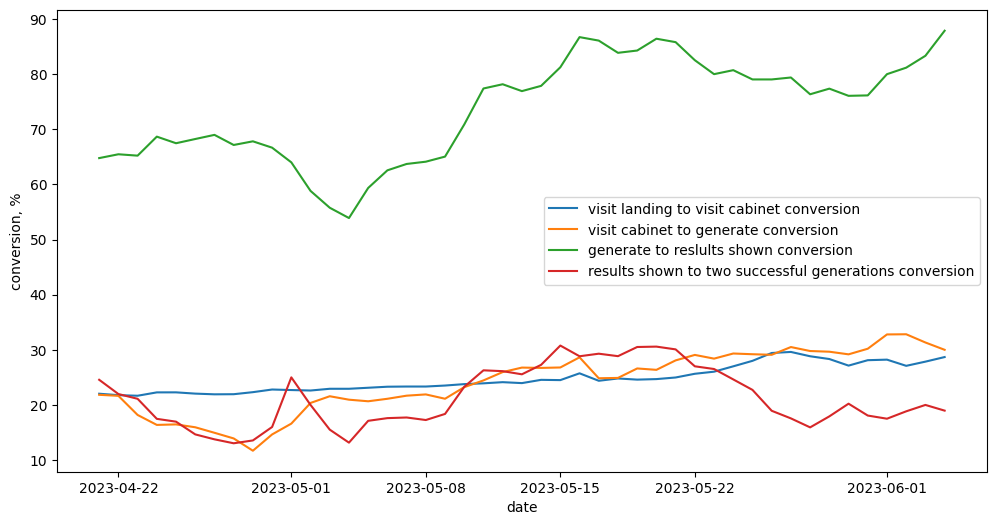

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(days, cab_land_conversion, label='visit landing to visit cabinet conversion')
plt.plot(days, gen_cab_conversion, label='visit cabinet to generate conversion')
plt.plot(days, res_gen_conversion, label='generate to reslults shown conversion')
plt.plot(days, two_gen_gen_conversion, label='results shown to two successful generations conversion')
plt.ylabel('conversion, %')
plt.xlabel('date')
plt.legend();

# 2.5 (1 балл)

У команды появилась гипотеза, что пользователи часто не дожидаются окончания генерации, так как она длится долго (20+ секунд). Тем более, что на экране генерации пользователю показывается бесконечный спиннер и ему непонятно, есть ли какой-то прогресс в генерации или сервис давно сломался.

20 мая экран генерации поменяли. Пользователю, вместо спиннера, показывается сообщение с текстом "Спасибо за ожидание! Генерация рекламы длится до одной минуты. Еще немного и вы получите лучшие рекламные объявления"

Аналитик решил проверить, как время генерации для первого запуска пользователя влияет на его конверсию в последующую генерацию.

Ниже представлен график по данным с 20 мая.
1. Попробуйте построить такой же график
2. Напишите, как вы интерпретируете, данные на графике

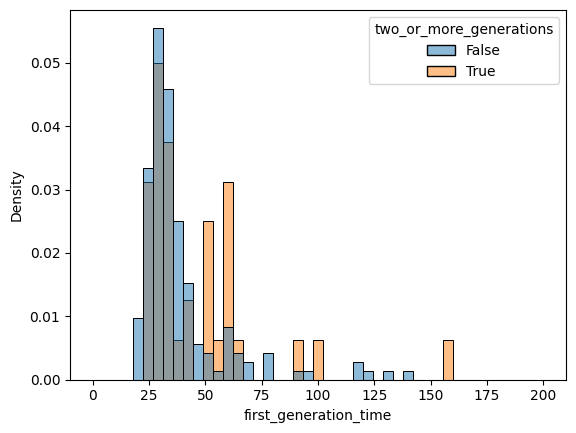

In [12]:
import seaborn as sns

# определила всех юзеров, кто совершал какую-либо активность на сайте до 20 мая:
old_users = set(df_copy['user_id'].loc[df_copy.event_timestamp < pd.Timestamp('2023-05-20')].drop_duplicates())
# создала колонку с флагом, старый юзер или нет:
df_copy['old_user'] = df_copy['user_id'].apply(lambda x: x in old_users)
# оставила только новых пользователей:
df_new = df_copy[['user_id', 'two_or_more_generations']].loc[df_copy.old_user == False]
# получила всех уникальных юзеров с меткой было ли у них 2 или более успешные генерации:
df_new = df_new.drop_duplicates()

# с помощью вспомогательного датафрейма добавили столбец с датой первой генерации пользователя
first_gen_df = df_copy[['user_id', 'event_timestamp']].loc[(df_copy.event_name == 'generate')&(~df_copy.generation_time.isna())].groupby('user_id').min()
first_gen_df.reset_index(inplace=True)
first_gen_df = first_gen_df.rename(columns={"event_timestamp": "first_generation_date"})
df_copy = df_copy.merge(first_gen_df, left_on='user_id', right_on='user_id', how='left')

# с помощью вспомогательного датафрейма добавили столбец с длительностью первой генерации пользователя
gen_time_df = df_copy[['generation_time', 'user_id']].loc[df_copy.event_timestamp == df_copy.first_generation_date].groupby('user_id').min()
gen_time_df = gen_time_df.rename(columns={"generation_time": "first_generation_time"})
df_new = df_new.merge(gen_time_df, left_on='user_id', right_on='user_id', how='inner')


sns.histplot(df_new, x="first_generation_time", hue="two_or_more_generations", stat="density", common_norm=False, binrange=(0, 200));

<Axes: xlabel='generation_time', ylabel='Density'>

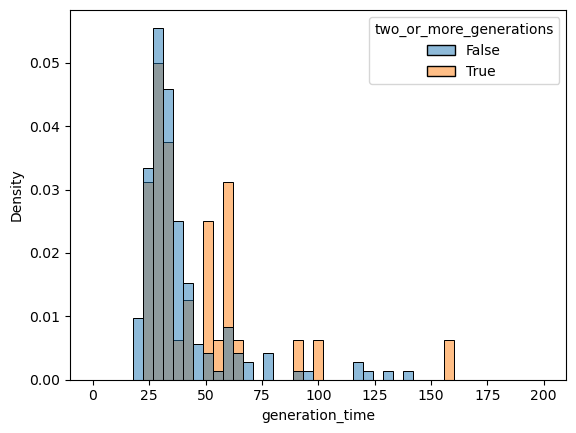

In [ ]:
# референс
import seaborn as sns

sns.histplot(res, x="generation_time", hue="two_or_more_generations", stat="density", common_norm=False, binrange=(0, 200))

* На самом деле генерация долгая (больше 20 секунд) почти у всех пользователей
* Пользователи с самой быстрой генерацией не сделали вторую генерацию
* Большая часть из тех юзеров, что сделали 2 и более успешные генерации, ждали меньше минуты в свою первую генерацию
* Тем не менее, много и тех, кто ждал меньше минуты, но вторую генерацию не сделал
* В целом, большая часть генераций ограничивается минутой
* Я скорее склоняюсь к тому, что время первой генерации не влияет на конверсию, однако для получения достоверной оценки, воспользовалась бы статистическими тестами
* Для того, чтобы оценить ценность нововведения, надо сравнивать этот график с графиком до 20 мая, чтобы понять изменился ли профиль распределения. Этот график ниже. Действительно, после нововведения пользователи с долгой (больше минуты) генерацией стали более склонны к повторной генерации.

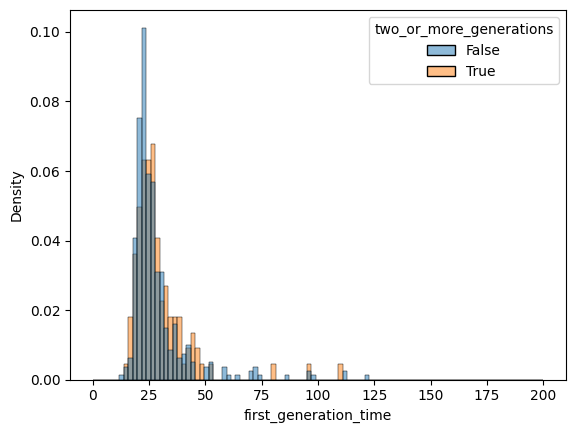

In [13]:
# Такой же график до 20 мая
df_new2 = df_copy[['user_id', 'two_or_more_generations']].loc[df_copy.old_user == True]
df_new2 = df_new2.drop_duplicates()
df_new2 = df_new2.merge(gen_time_df, left_on='user_id', right_on='user_id', how='inner')


sns.histplot(df_new2, x="first_generation_time", hue="two_or_more_generations", stat="density", common_norm=False, binrange=(0, 200));